# AI 1 Exercise 2: "Introduction to Python"

## 2.1 General Python Capabilities

### 1. Magic Commands 
#### 1-a) Write the Pythagorian Theorem using latex code.

In [1]:
%%latex
$$c = \sqrt{a^2 + b^2}$$

<IPython.core.display.Latex object>

#### 1-b) What is the difference between "%magic" and "%%magic"?

In [2]:
# Magic commands with a single “%“ are called “line magic“ and only refer to the line in which they are inserted. 
# Magic comands with “%%“ are called “cell magic“ and refer to the whole cell.

#### 1-c) You can try out further %magic commands, e.g., %who or %time.

* **Note:** Regarding %time, wall clock time is the actual amount of time taken to perform a job. This is equivalent to timing your job with a stopwatch and the measured time to complete your task can be affected by anything else that the system happens to be doing at the time.

In [3]:
n = 42
m = 10 
name = "Vader, Darth"
name2 = "Targaryen, Daenerys"

# 1. %who
# list all your defined variables (and functions):
%who
# list all your defined variables that are strings:
%who str
# list all your defined variables that are integers:
%who int

# 2. %time
%time

m	 n	 name	 name2	 
name	 name2	 
m	 n	 
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 12.9 µs


### 2. Tuples, Lists, and DataFrames
#### 2-a) Create a python tuple with the following input:
**{spicy soup, spicy chicken, spicy salad, simple soup, simple chicken, raw chicken}**

**Why is it usually not practical to use tuples?**


In [4]:
tup = ("spicy soup", "spicy chicken", "spicy salad", "simple soup", "simple chicken", "raw chicken")
print(tup)

# The use of tuples is only reasonable if you have a set of data that you never want to
# change or when you want to make sure it does not get changed.

('spicy soup', 'spicy chicken', 'spicy salad', 'simple soup', 'simple chicken', 'raw chicken')


#### 2-b) Transform the tuple into a pandas list. Then, transform it into a pandas dataframe with the two columns “adjective” and “noun”.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Transform tuple into a pandas list
food = list(tup)

# Create dataframe with the two columns "adjective" and "noun"
y = list()

for i in range(len(food)):
    x = food[i].split()
    y.append(x)
    
df = pd.DataFrame(y, columns=['adjective','noun'])

print(df)

  adjective     noun
0     spicy     soup
1     spicy  chicken
2     spicy    salad
3    simple     soup
4    simple  chicken
5       raw  chicken


#### 2-c) Replace “spicy“ with “peppery” for all dishes.

In [6]:
df2 = df['adjective'].replace('spicy','peppery',inplace=False)
print(df2)
# Note: 
# When the parameter "inplace" is true, then the given data frame object is changed. 
# If it is false, then the function returns a copy and leaves the original object unchanged

0    peppery
1    peppery
2    peppery
3     simple
4     simple
5        raw
Name: adjective, dtype: object


### 3. Classes in Python

#### 3-a) Create a class “child” having the attributes name, age, height, and weight.

In [7]:
class Child:
    def __init__(self, name, age, height, weight):
        self.name = name
        self.age = age
        self.height = height
        self.weight = weight

someChild = Child("Skywalker, Luke", 12, 145, 45)

# Note:
# the "__init__" function is the constructor of objects in Python

#### 3-b) Now, create a class “adult” that inherits the attributes of “child” and has the additional attribute occupation.

In [8]:
class Adult(Child):
    def __init__(self,name, age, height, weight, occupation):
        super().__init__(name, age, height, weight)
        #Child.__init__(self,name, age, height, weight)  ## this is an alternative to the previous line
        self.occupation = occupation
        
someAdult = Adult("Skywalker, Anakin", 38, 185, 88, "Dark Lord")

### 4. Pandas DataFrame

#### 4-a) Generate a pandas dataframe with size 10,000x3 filled with random integers between 0-1,000 and the column labels “A”, “B”, and “C”.

In [9]:
rnd = pd.DataFrame(np.random.randint(0,1000,size=(10000,3)), columns=list('ABC'))
print(rnd)

        A    B    C
0     605  175  402
1     483   13  400
2     718  109  433
3     895  493  839
4     788  702   40
...   ...  ...  ...
9995  612  209  568
9996  895  538   58
9997  795  840  118
9998  381  789  331
9999  663  426  139

[10000 rows x 3 columns]


#### 4-b) Measure how long the creation of that dataframe takes and how much memory it uses

In [10]:
# Time Measurement with %time:
rnd = pd.DataFrame(np.random.randint(0,1000,size=(10000,4)), columns=list('ABCD')) 
%time

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.06 µs


In [11]:
# Time Measurement with %timeit:
%timeit rnd = pd.DataFrame(np.random.randint(0,1000,size=(10000,4)), columns=list('ABCD')) 

234 µs ± 2.57 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [12]:
# Memory Measurement with .info():
rnd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       10000 non-null  int64
 1   B       10000 non-null  int64
 2   C       10000 non-null  int64
 3   D       10000 non-null  int64
dtypes: int64(4)
memory usage: 312.6 KB


#### 4-c) Provide some basic statistical values of the dataframe’s data

In [13]:
rnd.describe()

,A,B,C,D
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,504.569200,495.701000,498.736800,499.699200
std,288.075645,286.165339,289.500442,287.552234
min,0.000000,0.000000,0.000000,0.000000
25%,256.000000,251.000000,251.000000,251.000000
50%,508.000000,493.000000,497.000000,502.000000
75%,750.000000,743.000000,747.000000,749.000000
max,999.000000,999.000000,999.000000,999.000000


#### 4-d) Sort the first column and visualize the data of that column using some visualization of your choice.

        A    B    C    D
1524    0  545  999  121
5777    0  236  934  777
9919    0  161  363  793
5779    0  716  646  420
8886    0   72  391  187
...   ...  ...  ...  ...
4117  999   17  633  214
6524  999  917  246  573
487   999   13  312  437
1727  999  180  799  112
663   999  228  230  382

[10000 rows x 4 columns]


{'whiskers': [<matplotlib.lines.Line2D at 0x7fac602bf940>,
 'caps': [<matplotlib.lines.Line2D at 0x7fac602cb0a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fac602bf5b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fac602cb7c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fac602cbb50>],
 'means': []}

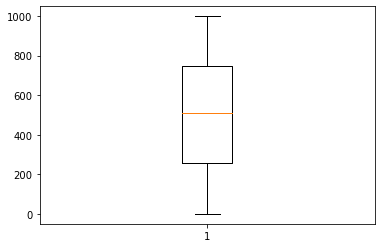

In [15]:
rnd = rnd.sort_values(by=['A'])
print(rnd)
plt.boxplot(rnd["A"])